# Task 1:

Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

In [5]:
import pandas as pd
#Baby names data from the link 
df = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


# Questions

1. Delete unnamed columns

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


2. Show the distribution of male and female

In [10]:
df1 = df['Gender'].value_counts()
print(df1)
print(df1/df1.sum()*100)

F    558846
M    457549
Name: Gender, dtype: int64
F    54.983151
M    45.016849
Name: Gender, dtype: float64


  55% of all babies born are female and 45% are male.

3. Show the top 5 most preferred names

In [17]:
name = df.groupby('Name').sum()

print(name.sort_values(by='Count', ascending=False))

                    Id     Year   Count
Name                                   
Jacob       1665681356  1141099  242874
Emma        1629482250  1137085  214852
Michael     1687521295  1161152  214405
Ethan       1660808475  1139091  209277
Isabella    1630131786  1137090  204798
...                ...      ...     ...
Eniola         4930126     2012       5
Atlantis       4904427     2005       5
Marci          4901273     2004       5
Simarpreet      553386     2011       5
Nita            536782     2007       5

[17632 rows x 3 columns]


Top 5 names are Jacob, Emma, Michael, Ethan and Isabella

4. What is the median name occurence in the dataset

In [18]:
med = name['Count'].median()
print(name[name['Count'] == med])

               Id   Year  Count
Name                           
Aishani   7810526  14078     49
Alara    18841027  16079     49
Alysse   22629405  16057     49
Ameir    21780411  16086     49
Anely     4349541  16071     49
...           ...    ...    ...
Sriram    9208203  14054     49
Trinton  32822302  16069     49
Vita     10241632  14075     49
Yoni      6439154  16060     49
Zuleima   3521373  14050     49

[66 rows x 3 columns]


5. Distribution of male and female born count by states

In [27]:
distribution = df.groupby(['State','Gender']).sum()
distribution.drop(['Id', 'Year'], axis=1, inplace=True)
print(distribution)

               Count
State Gender        
AK    F        26250
      M        37399
AL    F       215308
      M       260114
AR    F       129712
...              ...
WI    M       311758
WV    F        73800
      M        93557
WY    F        14107
      M        21912

[102 rows x 1 columns]


# Task 2:

We have the min and max temperatures in a city In India for each months of the year. We

would like to find a function to describe this and show it graphically, the dataset given below.

Task:
    
1. fitting it to the periodic function

2. plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [6]:
import numpy as np 
from scipy.optimize import curve_fit 
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn
import plotly.io as pio

%matplotlib inline

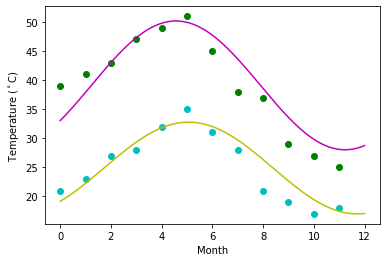

In [8]:
months = np.arange(12)
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()